In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime


In [2]:

# =============================================================================
# 0.2 Import data
# =============================================================================

train = pd.read_csv('data/train.csv', low_memory=False)
store = pd.read_csv('data/store.csv', low_memory=False)

#%% 1. Merging store to train data

# =============================================================================
# 1.1 Since data has to has the same size as 'train', a container is created
# =============================================================================

# Creating dataframe
expanded_store = train

# =============================================================================
# 1.2 Merging variables which do not have to be changed
# =============================================================================

# Variables which can be merged right away
easy = store.loc[:,['Store','StoreType','Assortment','CompetitionDistance']]

# Variables which can be simply merged
expanded_store = pd.merge(expanded_store, easy, on=['Store'])


In [3]:
expanded=expanded_store

In [4]:
print(expanded.shape)
print(train.shape)

(618473, 12)
(637774, 9)


In [5]:
train.info()
#Date needs to be changed to time(no NAs)
#train['Date'].isna().sum()
#Store needs to be made a non-number variable
#Day of Week -> nan's need to be converted to day number -> also need to be made dummies rather than continuous
#train['DayOfWeek'].isna().sum() -
#train['Sales'].isna().sum()
#train['StateHoliday'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 637774 entries, 0 to 637773
Data columns (total 9 columns):
Date             637774 non-null object
Store            618473 non-null float64
DayOfWeek        618757 non-null float64
Sales            618747 non-null float64
Customers        618683 non-null float64
Open             618588 non-null float64
Promo            618580 non-null float64
StateHoliday     618520 non-null object
SchoolHoliday    618437 non-null float64
dtypes: float64(7), object(2)
memory usage: 43.8+ MB


In [6]:
# Convert Dates to Date time
expanded['Date']=pd.to_datetime(expanded['Date'])
expanded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 618473 entries, 0 to 618472
Data columns (total 12 columns):
Date                   618473 non-null datetime64[ns]
Store                  618473 non-null float64
DayOfWeek              600036 non-null float64
Sales                  600028 non-null float64
Customers              599957 non-null float64
Open                   599832 non-null float64
Promo                  599791 non-null float64
StateHoliday           599873 non-null object
SchoolHoliday          599686 non-null float64
StoreType              618473 non-null object
Assortment             618473 non-null object
CompetitionDistance    616838 non-null float64
dtypes: datetime64[ns](1), float64(8), object(3)
memory usage: 61.3+ MB


In [136]:
 
    expanded['hour'] = expanded['Date'].dt.hour
    expanded['dayofweek'] = expanded['Date'].dt.dayofweek
    expanded['quarter'] = expanded['Date'].dt.quarter
    expanded['month'] = expanded['Date'].dt.month
    expanded['year'] = expanded['Date'].dt.year
    expanded['dayofyear'] = expanded['Date'].dt.dayofyear
    expanded['dayofmonth'] = expanded['Date'].dt.day
    expanded['weekofyear'] = expanded['Date'].dt.weekofyear

In [184]:
expanded= pd.get_dummies(expanded)
expanded.columns

Index(['Date', 'Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'SchoolHoliday', 'CompetitionDistance', 'StateHoliday_0',
       'StateHoliday_a', 'StateHoliday_b', 'StateHoliday_c', 'StoreType_a',
       'StoreType_b', 'StoreType_c', 'StoreType_d', 'Assortment_a',
       'Assortment_b', 'Assortment_c'],
      dtype='object')

In [187]:
#drop if any other values null

expanded_new=expanded.dropna(axis = 0, how ='any') 
expanded_new.info()
expanded_new.to_csv('data/train_all_10_Oct.csv')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 513606 entries, 0 to 618472
Data columns (total 20 columns):
Date                   513606 non-null datetime64[ns]
Store                  513606 non-null float64
DayOfWeek              513606 non-null float64
Sales                  513606 non-null float64
Customers              513606 non-null float64
Open                   513606 non-null float64
Promo                  513606 non-null float64
SchoolHoliday          513606 non-null float64
CompetitionDistance    513606 non-null float64
StateHoliday_0         513606 non-null uint8
StateHoliday_a         513606 non-null uint8
StateHoliday_b         513606 non-null uint8
StateHoliday_c         513606 non-null uint8
StoreType_a            513606 non-null uint8
StoreType_b            513606 non-null uint8
StoreType_c            513606 non-null uint8
StoreType_d            513606 non-null uint8
Assortment_a           513606 non-null uint8
Assortment_b           513606 non-null uint8
Assortmen

In [ ]:
pd.write

Check the data are what we think they are

In [139]:
# Just one entry per day per store? ..Yes
train_new.groupby(['Date','Store']).count()

DayOfWeek  Sales  Customers  Open  Promo  StateHoliday  \
Date       Store                                                            
2013-01-01 1.0             1      1          1     1      1             1   
           2.0             1      1          1     1      1             1   
           3.0             1      1          1     1      1             1   
           4.0             1      1          1     1      1             1   
           6.0             1      1          1     1      1             1   
...                      ...    ...        ...   ...    ...           ...   
2014-07-31 1108.0          1      1          1     1      1             1   
           1110.0          1      1          1     1      1             1   
           1112.0          1      1          1     1      1             1   
           1113.0          1      1          1     1      1             1   
           1114.0          1      1          1     1      1             1   

                   SchoolHoliday  hour  dayofweek  quarter  month  year  \
Date       Store                                                          
2013-01-01 1.0                 1     1          1        1      1     1   
           2.0                 1     1          1        1      1     1   
           3.0                 1     1          1        1      1     1   
           4.0                 1     1          1        1      1     1   
           6.0                 1     1          1        1      1     1   
...                          ...   ...        ...      ...    ...   ...   
2014-07-31 1108.0              1     1          1        1      1     1   
           1110.0              1     1          1        1      1     1   
           1112.0              1     1          1        1      1     1   
           1113.0              1     1          1        1      1     1   
           1114.0              1     1          1        1      1     1   

                   dayofyear  dayofmonth  weekofyear  
Date       Store                                      
2013-01-01 1.0             1           1           1  
           2.0             1           1           1  
           3.0             1           1           1  
           4.0             1           1           1  
           6.0             1           1           1  
...                      ...         ...         ...  
2014-07-31 1108.0          1           1           1  
           1110.0          1           1           1  
           1112.0          1           1           1  
           1113.0          1           1           1  
           1114.0          1           1           1  

[499419 rows x 15 columns]

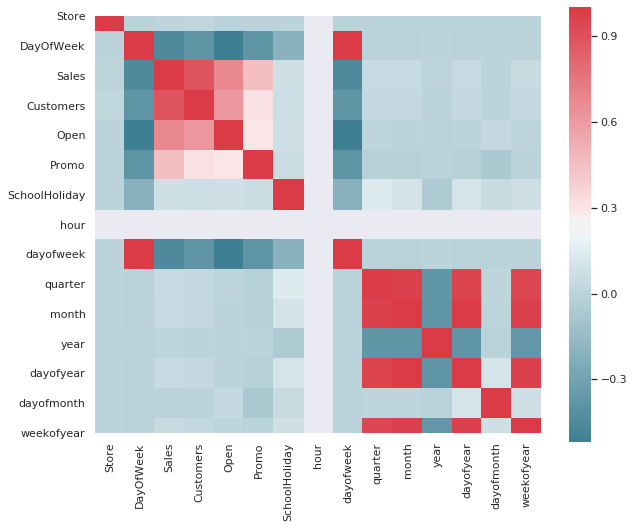

In [140]:
#Correlate Sales with all other variables?

import matplotlib.pyplot as plt
import seaborn as sns

f, ax = plt.subplots(figsize=(10, 8))
corr = train_new.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
square=True, ax=ax)

#customers, open and promo are the most highly correlated

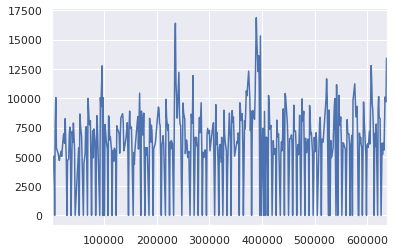

In [141]:
#plot sales over time, one store
sns.set()
train=train_new.loc[train_new['Store']==377]
train['Sales'].plot()


#train['2013-01-01':'2014-07-31']

#train_new['Date'].head()
#plt.plot(train.loc['2013-01-01':'2014-07-31','Sales'])


In [102]:
#plot sales over time, all stores?
print(max(train['Date']))
print(min(train['Date']))



2014-07-31 00:00:00
2013-01-01 00:00:00


In [173]:
#aggregate sales
sample=train_new.groupby(by=['year','weekofyear']).agg({'Sales':'sum'})

#s=np.array(sample)
#plt.plot(s)
sample.sort_values(by='Sales')

Sales
year weekofyear            
2014 1           16198972.0
     31          24767627.0
     30          24777562.0
     17          25061721.0
2013 21          25449346.0
...                     ...
2014 14          41704363.0
     23          42499314.0
2013 31          43311123.0
     49          47127929.0
     51          58777857.0

[83 rows x 1 columns]

In [131]:
date=datetime.datetime.now().strftime('%Y-%m-%d')
file='data/data'+date
train_new.to_csv(file)

AttributeError: 'NoneType' object has no attribute 'to_csv'